In [1]:
#using Pkg; Pkg.instantiate()
using EVQueues, Plots

In [2]:
lambda=40.0;
mu=1.0;
gamma=0.5;
C=20.0;

Tfinal=50.0;

snaps = collect(0:0.01:Tfinal);

In [3]:
sim = ev_lrpt(lambda,mu,gamma,Tfinal,C,snapshots=snaps)
compute_statistics!(sim)

Simulando... 100%|██████████████████████████████████████| Time: 0:00:01


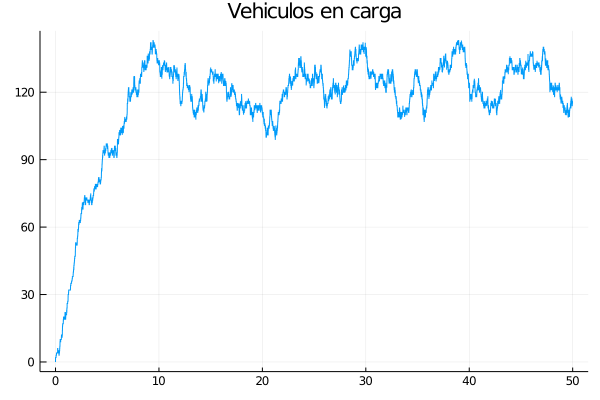

In [4]:
plot(sim.timetrace.T,sim.timetrace.X , legend=:none, title="Vehiculos en carga")


In [5]:
#diccionario para guardar los autos
d=Dict{Float64,Array{Array{Float64,1},1}}();

for snapshot in sim.snapshots

    charging = snapshot.charging;

    for j=1:length(charging)

        index = charging[j].arrivalTime;

        if haskey(d,index)
            push!(d[index],[snapshot.t-charging[j].arrivalTime;charging[j].currentWorkload;charging[j].currentDeadline])
        else
            d[index] = [];
        end
    end
end

d=sort(collect(d), by=x->x[1])

#me quedo con los perfiles de carga
d=[v[2] for v in d];

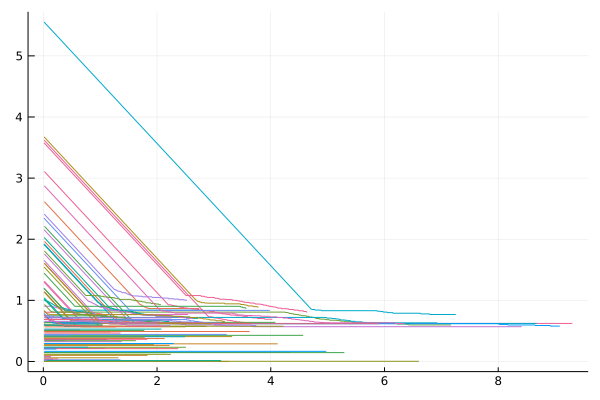

In [6]:
p=plot(legend=:none);

using StatsBase

#elijo 100 autos para mostrar
K = sample((500:1500),100)

for k=K

    trace = d[k];

    t = [z[1] for z in trace]
    sigma = [z[2] for z in trace]
    tau = [z[3] for z in trace]

    plot!(p,t,sigma)
    #p=plot!(t,tau)
end
p